## This is a notebook that use Linear Regression to predict the Cummulative Grade Point


#Import modules


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Loading the dataset

In [2]:
#Load the data
#Load the data
df = pd.read_excel (r'C:\Users\Dell\Downloads\Y1S2.xlsx', sheet_name='Sheet1')


In [3]:
#Display the first 7 row of data
df.head(7)

,Gender,State,UCCD1004,UCCD1203,UCCM2233,UCCN1004,MPU3301,Semester1_GPA,Semester1_CGPA,Semester2_CGPA
0,Female,Pahang,67,70,77,76,51,3.000000,3.000000,2.830435
1,Male,Kedah,56,71,61,66,67,2.835294,2.835294,2.917391
2,Male,Malacca,63,67,76,79,52,2.970588,2.970588,3.108696
3,Female,Kelantan,59,50,48,51,68,2.247059,2.247059,2.404348
4,Male,Perak,59,63,66,73,77,2.905882,2.905882,2.878261
5,Male,Johor,72,62,63,69,45,2.488235,2.488235,2.569565
6,Female,Negeri Sembilan,55,56,59,67,68,2.588235,2.588235,2.565217


In [4]:
#Count the number of rows and columns in the data set
df.shape

(10000, 10)

In [5]:
#Find the column that consist null value
df.isna().sum()

Gender            0
State             0
UCCD1004          0
UCCD1203          0
UCCM2233          0
UCCN1004          0
MPU3301           0
Semester1_GPA     1
Semester1_CGPA    1
Semester2_CGPA    3
dtype: int64

In [6]:
#Remove the row that consist of null value
df1=df.dropna()

In [7]:
#Check the if there still any null value
df1.isna().sum()

Gender            0
State             0
UCCD1004          0
UCCD1203          0
UCCM2233          0
UCCN1004          0
MPU3301           0
Semester1_GPA     0
Semester1_CGPA    0
Semester2_CGPA    0
dtype: int64

In [8]:
df1.describe()

,UCCD1004,UCCD1203,UCCM2233,UCCN1004,MPU3301,Semester1_GPA,Semester1_CGPA,Semester2_CGPA
count,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,64.035511,65.862059,65.853756,65.891768,62.958788,2.762389,2.762388,2.783464
std,7.056469,8.420169,8.320343,8.360517,10.188986,0.366048,0.366048,0.291765
min,42.000000,42.000000,42.000000,42.000000,36.000000,0.988235,0.988235,1.421739
25%,59.000000,60.000000,60.000000,59.000000,55.000000,2.535294,2.535294,2.608696
50%,64.000000,66.000000,66.000000,66.000000,63.000000,2.805882,2.805882,2.817391
75%,69.000000,72.000000,72.000000,72.000000,71.000000,3.035294,3.035294,3.000000
max,85.000000,89.000000,89.000000,89.000000,91.000000,3.629412,3.629412,3.556522


In [9]:
df1.dtypes

Gender             object
State              object
UCCD1004            int64
UCCD1203            int64
UCCM2233            int64
UCCN1004            int64
MPU3301             int64
Semester1_GPA     float64
Semester1_CGPA    float64
Semester2_CGPA    float64
dtype: object

#Exploratory Data Analysis

[Text(0.5, 1.0, 'Year 1 Semester 2 CGPA')]

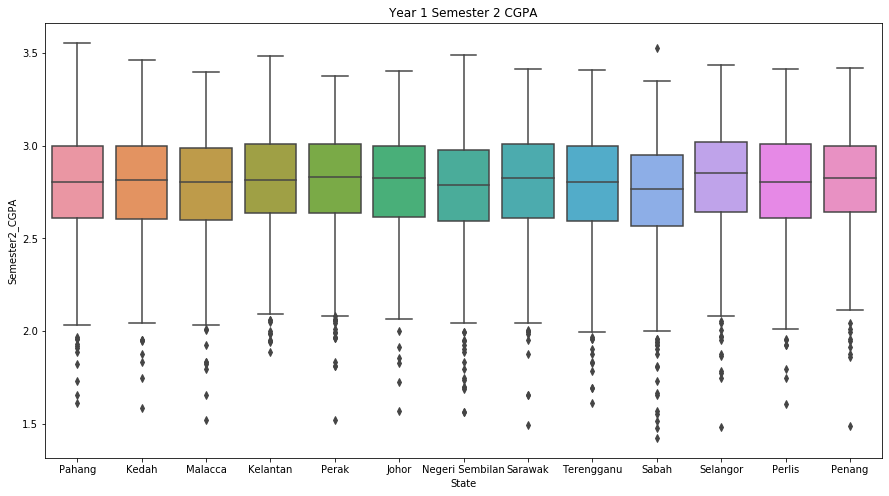

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(x='State', y='Semester2_CGPA',data=df1).set(title='Year 1 Semester 2 CGPA')

In [11]:
gen =df1[df1['Semester2_CGPA'].between(2.8,3.3)]

In [12]:
#Get a count of the number of each state
gen['State'].value_counts()

Johor              422
Selangor           414
Kedah              403
Terengganu         400
Perlis             400
Malacca            400
Kelantan           399
Sarawak            395
Perak              393
Negeri Sembilan    390
Penang             370
Pahang             367
Sabah              348
Name: State, dtype: int64

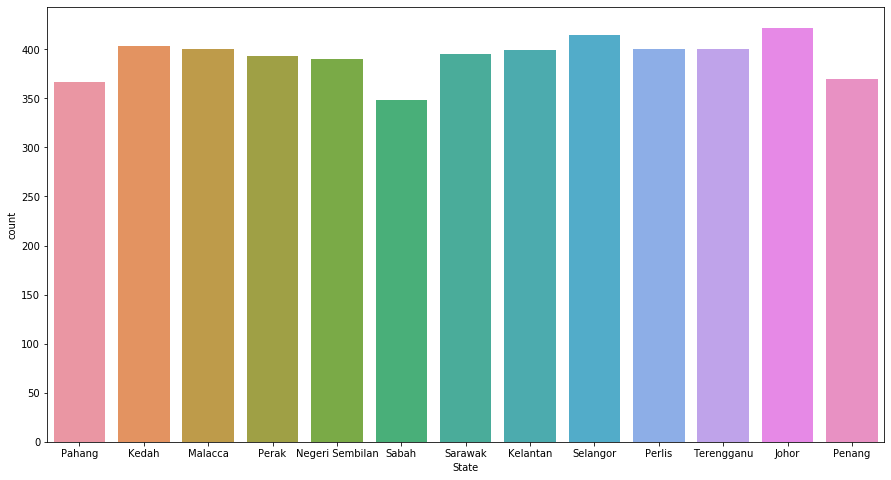

In [13]:
#Visualize the count of Grade
plt.figure(figsize=(15,8))
sns.countplot(gen['State'], label='count')

In [14]:
#Get a count of the number of each Gender
gen['Gender'].value_counts()


Female    2612
Male      2489
Name: Gender, dtype: int64

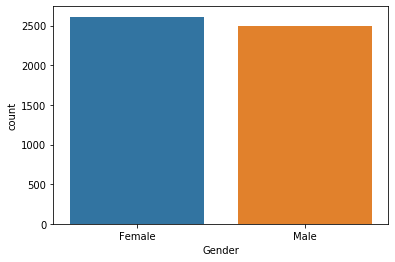

In [15]:
#Visualize the count of Gender
sns.countplot(gen['Gender'], label='count')

#Drop the column that does not related

In [16]:
df1.drop(['Gender','State'], axis='columns', inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df1.shape

(9997, 8)

In [18]:
#Print the data after dropping the columns
df1.head()

,UCCD1004,UCCD1203,UCCM2233,UCCN1004,MPU3301,Semester1_GPA,Semester1_CGPA,Semester2_CGPA
0,67,70,77,76,51,3.000000,3.000000,2.830435
1,56,71,61,66,67,2.835294,2.835294,2.917391
2,63,67,76,79,52,2.970588,2.970588,3.108696
3,59,50,48,51,68,2.247059,2.247059,2.404348
4,59,63,66,73,77,2.905882,2.905882,2.878261


#Splitting the data

In [19]:
#Split the data set into independent(X) and dependent(Y) data sets
y = df1.iloc[:,-1:]
X = df1.iloc[:,:-1]

In [20]:
#Split the data set into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#Feature Scaling

In [21]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#Model Training

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("Accuracy:" ,model.score(X_test, y_test)*100)

Accuracy: 85.54123333683464


In [24]:
prediction = model.predict(X_test)
print(prediction)
print(y_test)

[[2.50602015]
 [2.60332789]
 [2.6147971 ]
 ...
 [2.57650774]
 [2.87837939]
 [2.7861903 ]]
      Semester2_CGPA
8294        2.586957
792         2.591304
4919        2.604348
5038        2.917391
3266        3.039130
...              ...
1433        2.921739
7530        2.839130
5132        2.656522
5854        2.917391
2409        2.778261

[3000 rows x 1 columns]


In [25]:
import pickle 
pickle_out = open("Y1S2.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()